# Universidad del valle de Guatemala
## Lab 2 – Base 64 y XOR
### Cifrado de Informacion - Ludwing Cano
Abner Ivan Garcia Alegria - 21285

#### Ejercicio 1
Implementar una función que haga la operación XOR, bit a bit, con dos cadenas de
texto.

In [4]:
def encriptar_con_xor(mensaje, keystream):
    print("\nProceso de encriptación XOR:")
    print("-" * 50)
    print(f"Mensaje original: {mensaje}")
    print(f"Keystream original: {keystream}")

    # Ajustar keystream
    while len(keystream) < len(mensaje):
        keystream += keystream
    print(f"Keystream ajustado: {keystream}")

    print("\nOperación XOR byte por byte:")
    mensaje_encriptado = []
    for i in range(len(mensaje)):
        byte_mensaje = mensaje[i]
        byte_key = keystream[i]
        byte_resultado = byte_mensaje ^ byte_key
        
        print(f"\nPosición {i}:")
        print(f"Byte mensaje: {byte_mensaje:08b} ({chr(byte_mensaje)})")
        print(f"Byte key:    {byte_key:08b} ({chr(byte_key)})")
        print(f"Resultado:   {byte_resultado:08b} ({hex(byte_resultado)})")
        
        mensaje_encriptado.append(byte_resultado)

    resultado_final = bytes(mensaje_encriptado)
    print("\n" + "-" * 50)
    print(f"Resultado final (bytes): {resultado_final}")
    print(f"Resultado final (hex): {resultado_final.hex()}")
    
    return resultado_final

In [3]:
# Ejemplo de uso
texto = b'hola'
clave = b'si'

resultado = encriptar_con_xor(texto, clave)


Proceso de encriptación XOR:
--------------------------------------------------
Mensaje original: b'hola'
Keystream original: b'si'
Keystream ajustado: b'sisi'

Operación XOR byte por byte:

Posición 0:
Byte mensaje: 01101000 (h)
Byte key:    01110011 (s)
Resultado:   00011011 (0x1b)

Posición 1:
Byte mensaje: 01101111 (o)
Byte key:    01101001 (i)
Resultado:   00000110 (0x6)

Posición 2:
Byte mensaje: 01101100 (l)
Byte key:    01110011 (s)
Resultado:   00011111 (0x1f)

Posición 3:
Byte mensaje: 01100001 (a)
Byte key:    01101001 (i)
Resultado:   00001000 (0x8)

--------------------------------------------------
Resultado final (bytes): b'\x1b\x06\x1f\x08'
Resultado final (hex): 1b061f08


#### Ejercicio 2
Dada la imagen XOR_Imagen, y la llave “cifrados_2025” encontrar el valor original de la
imagen.

a. Deben de convertir la imagen a base 64 y aplicarle un xor con la llave para
encontrar su valor

In [ ]:
imagen = "./imagen_xor.png" # Imagen a cifrar

clave = b'cifrados_2025' # Clave para cifrar la imagen

with open(imagen, "rb") as f:  # Leer imagen
    imagen_bytes = f.read() # Convertir imagen a bytes

imagen_resultado = encriptar_con_xor(imagen_bytes, clave) # Cifrar imagen

with open("./imagen_xor_cifrada.png", "wb") as f:  # Guardar imagen cifrada
    f.write(imagen_resultado)  # Guardar imagen cifrada
    print("\nImagen cifrada guardada en /imagen_xor_cifrada.png") # Mensaje de confirmación

Imagen cifrada guardada en /imagen_xor_cifrada.png

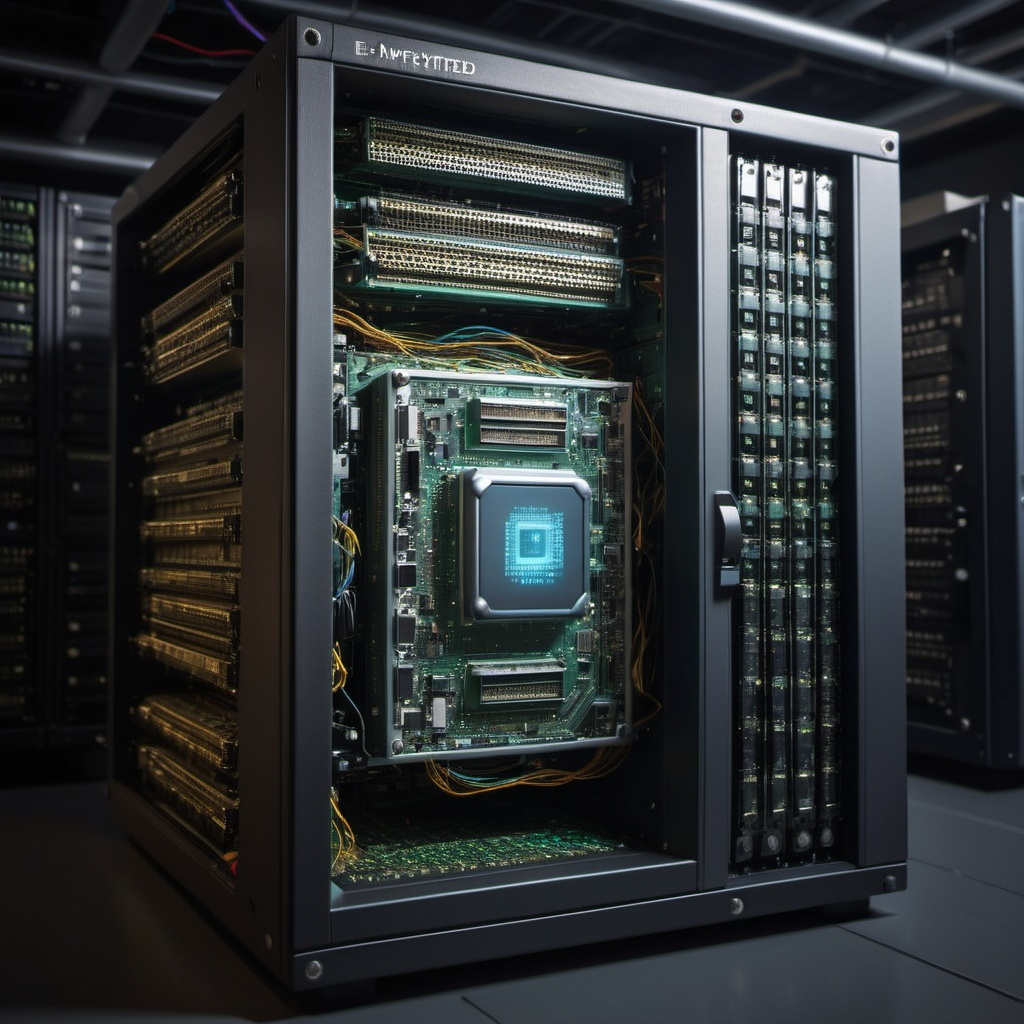

## Ejercicio 3
Investigar porque al aplicar XOR con una llave de texto la imagén se corrompe.

R// Al aplicar XOR a una imagen con una llave de texto, lo que hace es modificar el valor de cada píxel de la imagen basándote en el valor de la llave. Es como si cada color de la imagen original se mezclara con un color "aleatorio" de la llave, resultando en colores completamente nuevos y sin relación aparente con la imagen original. Por ejemplo, imaginemos que estamos pintando un retrato con una paleta de colores que cambia constantemente y sin control; el resultado final sería una imagen irreconocible y "corrompida".

Este texto fue sacado en base a la referencia de
Khan Academy. (s. f.). https://es.khanacademy.org/computing/computer-science/cryptography/ciphers/a/xor-bitwise-operation

## Ejercicio 4
Investigar como aplicar un xor a 2 imagnes. Para esto deben de eleccionar 2 imágenes,
luego proceder hacer un xor entre las dos imágenes. Esto significa que una imagen es la
original y la otra se utilizará como llave para aplicar el xor.

a. Mostrar las imágenes utilizadas y el resultado, asi mismo explique que
inconvenientes encontro al momento de realizar el xor.

“Recordemos que cuando aplicamos la operación XOR a una imagen, estamos realizando
una manipulación de bits en cada píxel de la imagen. La operación XOR combina dos
conjuntos de bits en una posición correspondiente y produce un nuevo conjunto de bits
como resultado. La peculiaridad del XOR es que devuelve 1 en una posición si los bits son
diferentes y 0 si son iguales.”

Tips:
- Pueden utilizar la librería pillow (Images)
o resize : tener el mismo tamaño de pixeles
o fromarray: toma un array y crea una imagen
- Pueden utilizar numpy
o bitwise_xor: aplica un xor a nivel de bits de las imágenes
from PIL import Image # pip install pillow
import numpy as np
Imagen Original Imagen Llave: Imagen resultante:


In [ ]:
# Aplicar XOR manualmente a dos imágenes utilizando librerías de Python
from PIL import Image
import numpy as np

# Abrir imágenes
imagen1 = Image.open("./Call.png")
imagen2 = Image.open("Call1.png")

# Este hace que las imágenes sean del mismo tamaño
# Convertir ambas imágenes al modo 'RGB'
imagen1 = imagen1.convert('RGB')
imagen2 = imagen2.convert('RGB')

# Redimensionar la segunda imagen al tamaño de la primera
size = imagen1.size
imagen2 = imagen2.resize(size)

# Convertir imágenes a arrays
imagen1_np = np.array(imagen1)
imagen2_np = np.array(imagen2)

# Realizar operación XOR
resultado = imagen1_np ^ imagen2_np

# Convertir resultado a uint8 para asegurar compatibilidad
resultado = resultado.astype(np.uint8)

# Convertir array a imagen y guardar
resultado_imagen = Image.fromarray(resultado)
resultado_imagen.save("imagenes_xor.png")
resultado_imagen.show()


Tamaño imagen1: (318, 159)
Tamaño imagen2: (318, 159)
Modo imagen1: RGB
Modo imagen2: RGB


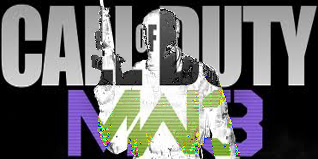

In [6]:
# Probando con las imagenes de ejemplo de Ludwing
# Aplicar XOR manualmente a dos imágenes utilizando librerías de Python
from PIL import Image
import numpy as np

# Abrir imágenes
imagen1 = Image.open("./imagen3.jpg")
imagen2 = Image.open("./imagen4.jpg")

# Este hace que las imágenes sean del mismo tamaño
# Convertir ambas imágenes al modo 'RGB'
imagen1 = imagen1.convert('RGB')
imagen2 = imagen2.convert('RGB')

# Redimensionar la segunda imagen al tamaño de la primera
size = imagen1.size
imagen2 = imagen2.resize(size)

# Convertir imágenes a arrays
imagen1_np = np.array(imagen1)
imagen2_np = np.array(imagen2)

# Realizar operación XOR
resultado = imagen1_np ^ imagen2_np

# Convertir resultado a uint8 para asegurar compatibilidad
resultado = resultado.astype(np.uint8)

# Convertir array a imagen y guardar
resultado_imagen = Image.fromarray(resultado)
resultado_imagen.save("imagenes_xor3y4.png")
resultado_imagen.show()


## Imagen de prueba de Ludwing
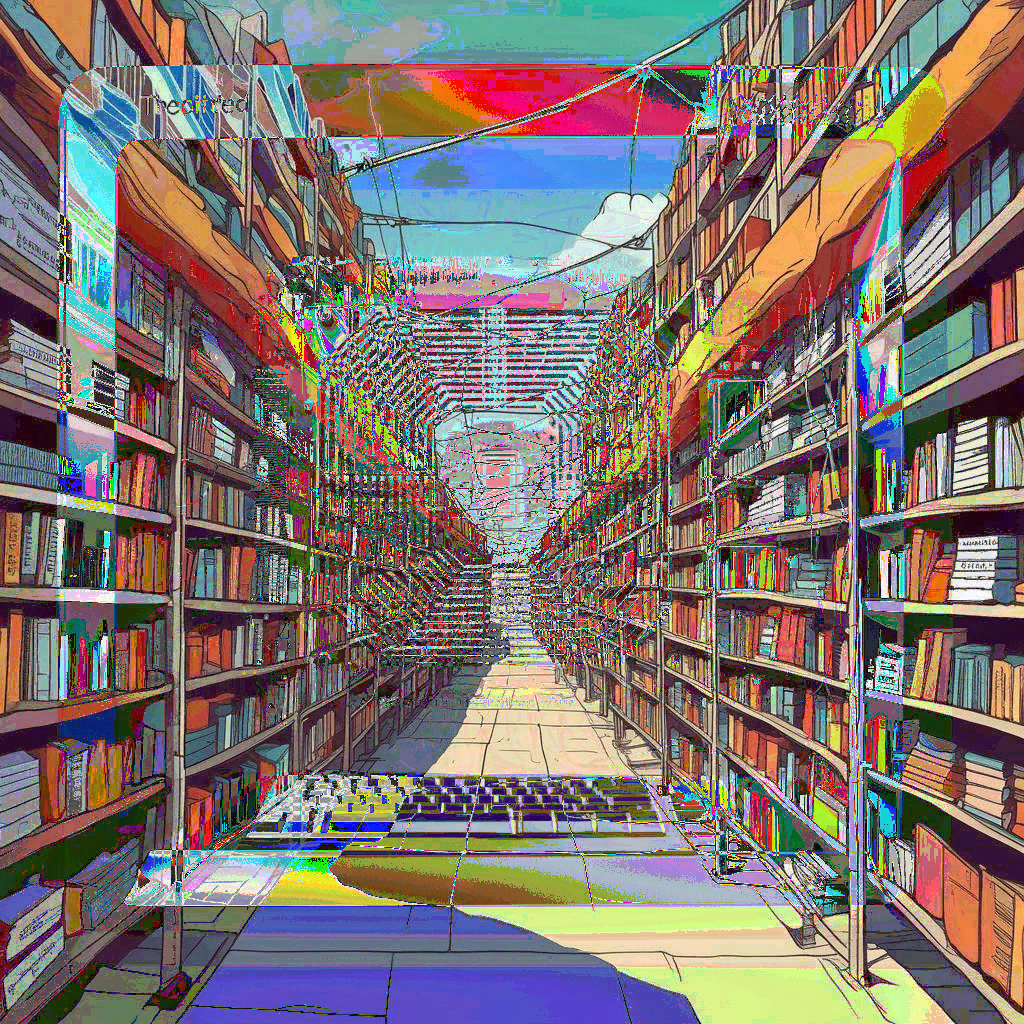

In [5]:
# Aplicando XOR con mi función de encriptación sin librearías
imagen1 = "./Call.png"
imagen2 = "./Call1.png"

with open(imagen1, "rb") as f:  # Leer imagen
    imagen1_bytes = f.read() # Convertir imagen a bytes

with open(imagen2, "rb") as f:  # Leer imagen
    imagen2_bytes = f.read() # Convertir imagen a bytes

resultado = encriptar_con_xor(imagen1_bytes, imagen2_bytes) # Cifrar imagen

with open("./imagen_xor_juntada.png", "wb") as f:  # Guardar imagen cifrada
    f.write(resultado)  # Guardar imagen cifrada
    print("\nImagen cifrada guardada en /imagen_xor_juntada.png") # Mensaje de confirmación


Proceso de encriptación XOR:
--------------------------------------------------
Mensaje original: b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x12\x11\x15\x12\x12\x12\x16\x16\x12\x15\x15\x1a\x18\x15\x15\x18\x15\x17\x15\x15\x17\x15\x16\x18\x16\x16\x15\x16\x17\x18\x18\x1d( \x18\x1a%\x1e\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x05\x05\x05\x0e\x05\x05\x0e+\x19\x13\x19++++++++++++++++++++++++++++++++++++++++++++++++++\xff\xc0\x00\x11\x08\x00\x9f\x01>\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x00\x00\x07\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x06\x07\x08\x05\xff\xc4\x00@\x10\x00\x01\x04\x00\x04\x03\x06\x03\x04\x07\x07\x05\x01\x00\x00\x00\x01\x00\x02\x03\x11\x04\x12!1\x05AQ\x06\x07\x13"aq2\x81\x91\x14\xa1\xb1\xc1\x08#BRb\xd1\xf0$Cr\x82\x92\xc2\xf1S\x93\xa2\xb2\xe13\xff\xc4\x00\x14\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xc4\x00\x14\x11\x01\x00\x0

## Imagen 1 Original
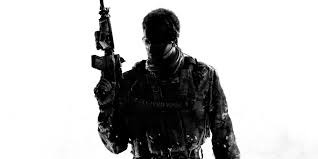

## Imagen 2 Original
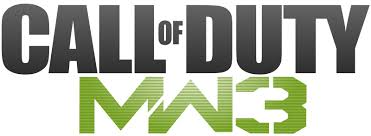

## Imagen Resultante XOR Imagen 1 XOR Imagen 2
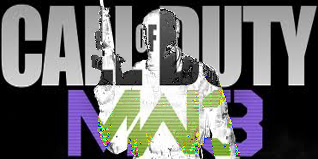

## Mis complicaciones al aplicar XOR

R// Al realizar la operación XOR entre dos imágenes, me encontré con varios inconvenientes.

Primero, las imágenes deben tener las mismas dimensiones. Si las imágenes tienen tamaños diferentes, no se puede realizar la operación XOR directamente, ya que no hay una correspondencia uno a uno entre los píxeles lo cual me toco que convertirlo a las mismas dimensiones cada imagen.

Otro problema surgio con el tipo de datos de las imágenes. La operación XOR se realiza bit a bit, por lo que las imágenes deben estar en un formato que lo permita y deben ser el mismo formato, hice pruebas con diferentes formatos y tendia a no generarme la imagen XOR por lo cual deben estar en el mismo formato.

Además, la operación XOR es sensible al ruido. Si las imágenes contienen ruido, este se verá amplificado en la imagen resultante, lo que puede dificultar la visualización de la información original.